# Introduction to Data Science
## Homework 3

Student Name: Muhe Xie

Student Netid: mx419
***

### Part 1
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

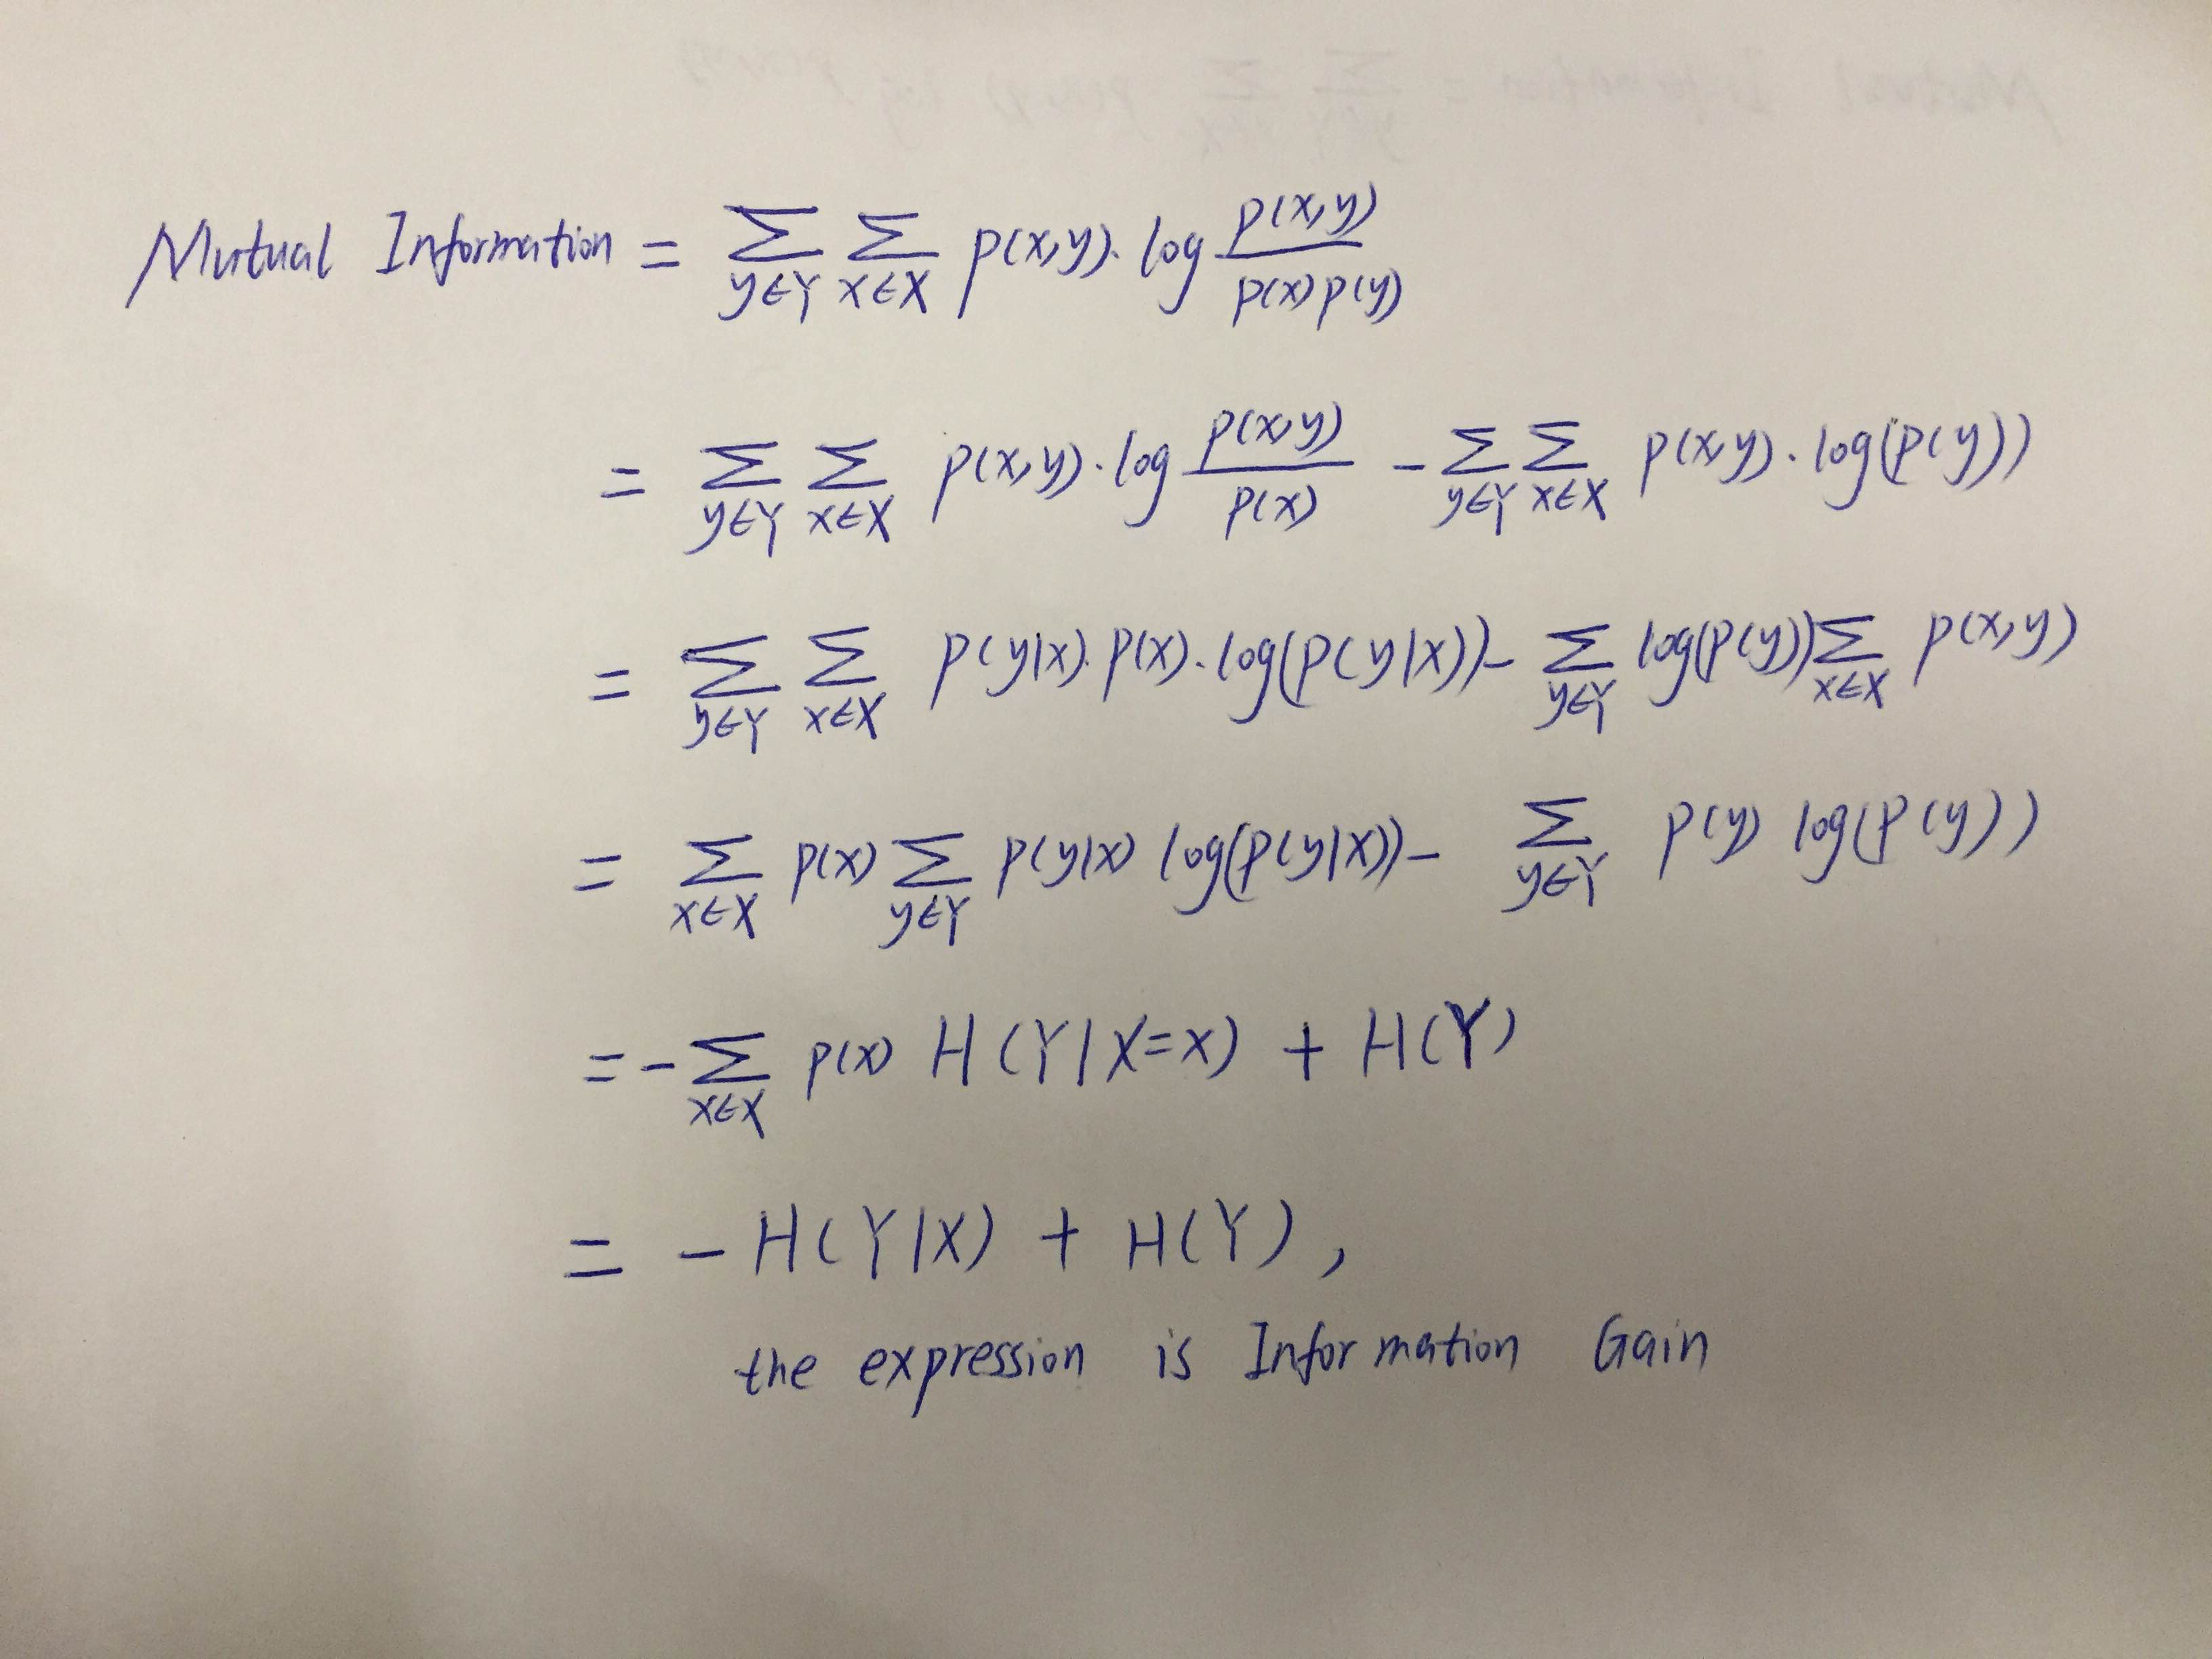

In [99]:
#Place your answer here!
from IPython.display import Image
Image(filename='math_proof.JPG') 

### Part 2 - Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [100]:
import pandas as pd
import numpy as np
import random
data = pd.read_csv('cell2cell_data.csv') #read data
rows = np.random.choice(39859, size= 31887, replace=False)
train_df = data.ix[rows]
test_df = data.drop(rows)

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

To prove the sample is unbiased, we can calculate the distributions of the X feature(variable) in the origin dataset and in the sample(include train data and test data) dataset. If the distributions are similar in the origin data and sample data. We can say the sample is unbiased and indeed random. 

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [101]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import export_graphviz

decision_tree = DecisionTreeClassifier(criterion="entropy")
X = train_df.drop(['churndep'],axis = 1)
Y = train_df['churndep']
decision_tree.fit(X,Y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

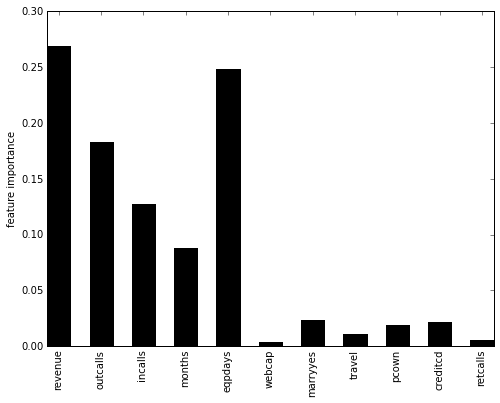

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

importanceList = decision_tree.feature_importances_
N = 11
ind = np.arange(N)
width = 0.55
fig,ax = plt.subplots(figsize=(8, 6)) #set size
ax.set_ylabel('feature importance')  # set y label
ax.set_xticks(ind+width/2) # set xtick position
ax.set_xticklabels(train_df.columns,rotation = "vertical")
rects1 = ax.bar(ind, importanceList,width,color = 'black')
# Code here

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [103]:
# Code/answer here
important3 = train_df[['revenue','outcalls','eqpdays','churndep']]
important3.corr()
# Answer:
# According to the correlation table, revenue and outcalls are positively related , 
# while eqpdays and revenue, eqpdays and outcalls are negatively related.
# Explanation: 
# (1) More monthly revenue a customer have, customer will care less about the cost of the service(product).
#     and he or she will be less likely to churn
# (2) More outcalls a customer makes, the customer will be more likely to continue to use it because the
#     customer has been used to it.
# (3) The longer time the customer has been using the equipment, the more likely the customer will choose
#     to change to a new one. Which means the customer will more likely to churn


,revenue,outcalls,eqpdays,churndep
revenue,1.000000,0.502692,-0.221081,-0.013858
outcalls,0.502692,1.000000,-0.243672,-0.035404
eqpdays,-0.221081,-0.243672,1.000000,0.110795
churndep,-0.013858,-0.035404,0.110795,1.000000


6\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

In [104]:
# Code here
print "Accuracy = %.3f" % (metrics.accuracy_score(decision_tree.predict(X), Y))
X2 =test_df.drop(['churndep'],axis = 1)
Y2 = test_df['churndep']
#print 'testdata'
print "Accuracy = %.3f" % (metrics.accuracy_score(decision_tree.predict(X2), Y2))

Accuracy = 1.000
Accuracy = 0.534


### Part 3 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [105]:
# Code here
min_samples_split_values = range(100,2100,200)
min_samples_leaf_values = range(30,230,20)

2\. Explain in words your reasoning for choosing the above ranges.

Answer: I choose a relatively wide ranges of both min_samples_leaf and min_samples_split, which is more likely to cover both the underfitting and overfitting part, so that I can find the trend of accuracy as the values of the parameters change.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

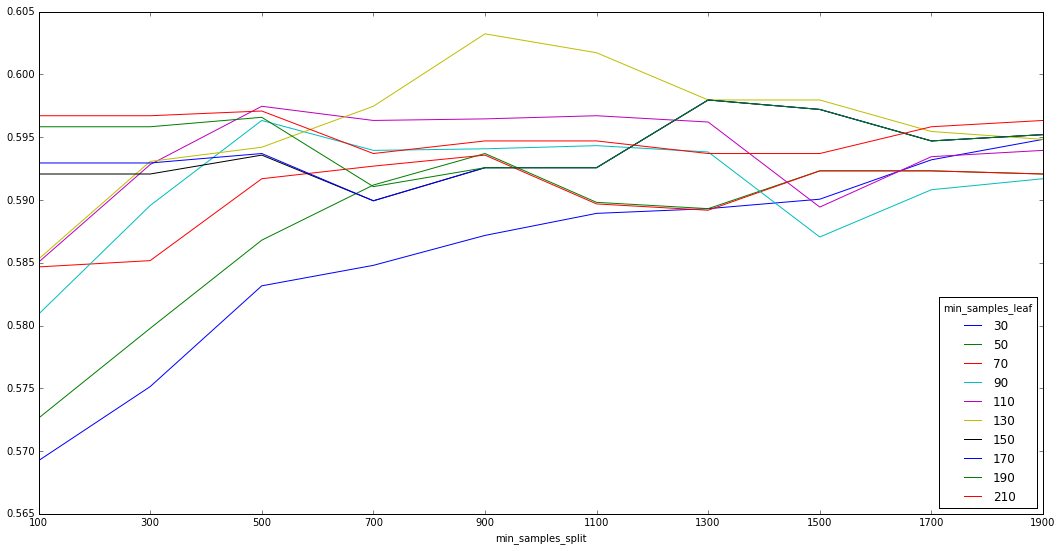

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

# prepare for the train data and test data
X = train_df.drop(['churndep'],axis = 1)
Y = train_df['churndep']
X2 =test_df.drop(['churndep'],axis = 1)
Y2 = test_df['churndep']

# use a data frame to store the results of 100 accuracy values
frame = pd.DataFrame(columns=min_samples_leaf_values,index = min_samples_split_values)
# calculate the accuracy
for min_samples_split_value in min_samples_split_values:
    for min_samples_leaf_value in min_samples_leaf_values:
        decision_tree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=min_samples_leaf_value,min_samples_split=min_samples_split_value)
        decision_tree.fit(X,Y)
        frame.ix[min_samples_split_value,min_samples_leaf_value] = metrics.accuracy_score(decision_tree.predict(X2), Y2)
            
frame.columns.name = "min_samples_leaf"
frame.index.name = "min_samples_split"
frame.plot(figsize = (18,9),xticks=frame.index)



4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [107]:
# Code here
max_accuracy = 0 # find the max accuracy
max_accuracy_leaf_value = 0 # min_samples_split_value for the max accuracy
max_accuracy_split_value = 0 # min_samples_split_value for the max accuracy
for leaf_value in frame.columns:
    for split_value in frame.index:
        if frame[leaf_value][split_value] > max_accuracy:
            max_accuracy = frame[leaf_value][split_value]
            max_accuracy_leaf_value = leaf_value
            max_accuracy_split_value = split_value
print "The best accuracy is %.5f" % max_accuracy
print "the best configuration is: min_samples_split_value = %d, min_samples_leaf_value = %d" %(max_accuracy_split_value,max_accuracy_leaf_value)

            

The best accuracy is 0.60324
the best configuration is: min_samples_split_value = 900, min_samples_leaf_value = 130


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

Answer:

1 Marketing department can utilize this prediction model to find the factors that will significantly influece the customers' decisions of churn and find solutions to improve those factors in order to keep the customers. Thus the churn rate will be lower.

2 Also, the department can use the model to predict whether a specific customer will churn. And may find what kind of customers will more likely to churn. Which may help to find the target potential "high quality" customers so that company can focus more on these customers.